# Tools for Data Science – Modules on Classification – Exercises

In this exercise you will use classification methods to classify handwritten digits.

In [3]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## 1.  Conceptual Questions

## Task 1.1

Provide a detailed explanation of the algorithm used to fit a decision tree.

**Your answer goes here** : A decision tree model classifies data by repeatedly splitting a given dataset into smaller ones based on feature values to make groups that are as pure as possible. This means the data points in each group mostly belong to the same class. The algorithm starts with the entire dataset at the root and looks at all available features to find the best question to ask (an example would be like: “Is age > 30?”). For each possible feature and threshold, it calculates how good the split would be using a measure of impurity such as Gini impurity or entropy. The goal is to pick the split that reduces impurity the most, in other words, the one that most effectively separates the data by class. Once the best split is chosen, the data is divided into two branches: one where the condition is true, and one where it is false. This process repeats for each new group of data, growing the tree deeper, until stopping conditions are met. Stopping conditions might be the maximum depth being reached, the node becoming pure (only one class left), or there not being enough samples to partition further. In the end, each path through the tree leads to a leaf node, which represents the predicted class for any data point that follows that path during prediction.

## Task 1.2

In this question we will explore a maximal margin classifier (think SVM) using a toy data set.

We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label.

![](Table.png)


(a) Sketch the observations.

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane. 

(c) On your sketch, indicate the margin for the maximal margin hyperplane, and indicate the support vectors for the maximal margin classifier.

(d) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane (make sure to label this as not being the optimal one).

(e) Draw an additional observation on the plot (use a different color and label your new point in some way) so that the two classes are no longer separable by a hyperplane.

Now take a picture or your sketch, save it as a png file in the same folder as this document, and then edit the cell below to show the picture.

**Your picture goes here** : ![Sam Strickler](mod9.png)

(f) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0$, $\beta_1$, and $\beta_2$.

**Your answer goes here** : The classification rule for the maximal margin classifier is to assign a point to the Red class if $\beta_0$ + $\beta_1$ $X_1$ + $\beta_2$ $X_2$ > 0, and to the Blue class otherwise. The rule defines a linear boundary that maximizes the distance between the two classes. The values of $\beta_0$, $\beta_1$, and $\beta_2$ all depend on the specific location of the support vectors in the training data and are calculated by solving an optimization problem that maximizes the margin while correctly separating the classes.

## 2. Applied Questions - The MNIST handwritten digits

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can apply the classification algorithms we studied to them.

Because both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods.  

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

1) Classes: 10 (one for each digit)
2) Samples total: 1797
3) Samples per class: $\approx$ 180
4) Dimensionality: 64 (8 pixels by 8 pixels)
5) Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [4]:
digits = load_digits()
#X = digits.data
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))


<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [5]:
# this is what one digit (a zero) looks like

print("===\nThe digit")
print(digits.target[0])

print("===\nThe raw data")
print(digits.images[0])

print("===\nThe scaled data")
print(X[0])

===
The digit
0
===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.757435

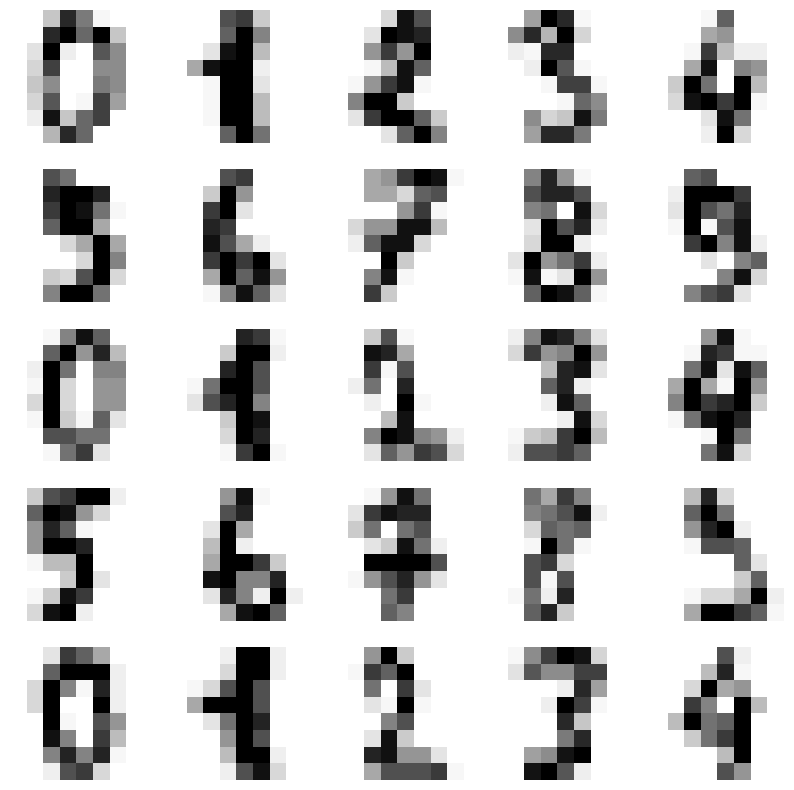

In [6]:
# plot a few of the images

plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(digits.images[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()


You might find [this webpage](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py) to be generally helpful for this exercise. 

### Task 2.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
    1. Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
    2. Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? **Note: this corresponds to the largest off-diagonal entry of the confusion matrix.**
    3. Try a couple of other C values and comment on how the results change

In [7]:
# Load the full digits dataset and scale the data
digits = load_digits()
X = scale(digits.data)
y = digits.target

# Split the data (20% training, 80% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

# Train an SVM with RBF kernel and C=100 on the training set
model = svm.SVC(kernel='rbf', C=100)
model.fit(X_train, y_train)

# Evaluate the accuracy on the test set
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy with C=100:", accuracy)

# Compute the confusion matrix on the test set
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix with C=100:")
print(cm)

# Identify the largest off-diagonal entry (most common mistake)
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)
most_common_error = np.max(cm_no_diag)
print("Most common mistake (largest off-diagonal entry):", most_common_error)

# Try a couple of other C values and observe changes
for C_val in [1, 10, 1000]:
    model = svm.SVC(kernel='rbf', C=C_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    cm_no_diag = cm.copy()
    np.fill_diagonal(cm_no_diag, 0)
    common_error = np.max(cm_no_diag)
    
    print(f"\nFor C = {C_val}:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Most common mistake (largest off-diagonal entry):", common_error)

Accuracy with C=100: 0.9534075104311543
Confusion Matrix with C=100:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]
Most common mistake (largest off-diagonal entry): 13

For C = 1:
Accuracy: 0.9401947148817803
Confusion Matrix:
 [[130   0   0   0   0   0   0   0   0   0]
 [  0 139   7   0   0   0   0   1   2   0]
 [  0   1 130   0   0   0   0   3   8   0]
 [  0   0   2 130   0   1   0   6   7   1]
 [  0   0   0   0 138   0   0  14   0   0]
 [  0   0   0   0   0 142   1   0   1   3]
 [  0   4   0   0   0   0 141   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   3   0   1   0   0   0   2 127   0]


**Your Interpretation**: When using an RBF kernel, setting C to 10, 100, or 1000 gives similar accuracy (around 95.3%) with the most common misclassification being 13 instances, while a lower C value of 1 slightly reduces accuracy to about 94.0% and increases the most common error to 14. This indicates that a moderate to high C value yields stable, optimal performance, whereas a very low C leads to a wider margin that underfits the data.

### Tasks 2.2 and 2.3: Prediction with k-nearest neighbors
`Repeat` Task 2.1 using k-nearest neighbors (k-NN). In Task 2.2, use k=10. In Task 2.3, try two other k values. How do your results for SVM and k-nearest neighbors compare?

In [8]:
# Load and scale the digits dataset
digits = load_digits()
X = scale(digits.data)
y = digits.target

# Split the data (20% training, 80% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

# Task 2.2: k-NN with k=10
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
y_pred10 = knn10.predict(X_test)
accuracy10 = metrics.accuracy_score(y_test, y_pred10)
cm10 = metrics.confusion_matrix(y_test, y_pred10)
cm_no_diag10 = cm10.copy()
np.fill_diagonal(cm_no_diag10, 0)
common_error10 = np.max(cm_no_diag10)
print("k-NN (k=10)")
print("Accuracy:", accuracy10)
print("Confusion Matrix:")
print(cm10)
print("Most common mistake:", common_error10)

# Task 2.3: Try k=5 and k=15
for k_val in [5, 15]:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_no_diag = cm.copy()
    np.fill_diagonal(cm_no_diag, 0)
    common_error = np.max(cm_no_diag)
    
    print(f"\nk-NN (k={k_val}):")
    print("Accuracy:", acc)
    print("Confusion Matrix:")
    print(cm)
    print("Most common mistake:", common_error)

k-NN (k=10)
Accuracy: 0.9123783031988874
Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Most common mistake: 11

k-NN (k=5):
Accuracy: 0.9304589707927677
Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 141   6   0   0   2   0   0   0   0]
 [  1   3 128   0   1   0   0   1   7   1]
 [  1   0   1 135   0   1   0   5   2   2]
 [  0   0   0   0 146   0   0   5   1   0]
 [  1   1   0   3   1 138   1   0   0   2]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   7   1   5   0   1   0   1 116   2]
 [  1   3   1   7   2   5   1   5   5 1

**Your Interpretation**: For k-NN, the results show that with k=10 the accuracy is about 91.2% and the largest misclassification error is 11, whereas with k=5 the accuracy improves to about 93.0% but the most common mistake increases to 17. Compared to SVM, which achieved roughly 95.3% accuracy with a most common error of 13, k-NN appears slightly less accurate and more sensitive to the choice of k. This suggests that while tuning k can improve k-NN’s overall accuracy, its error distribution can vary more than SVM’s more stable performance on this dataset.